In [1]:
# Importing libraries:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importing the os library specifically for reading the csv once I've created the file in my working directory.
import os

# web-based requests
import requests
import datetime

In [2]:
from vega_datasets import data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
print(pd.__version__)

1.1.3


# Exercises

In [4]:
temp_df = data.sf_temps()
temp_df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
temp_df = temp_df.set_index('date').sort_index()

In [6]:
temp_df.isnull().sum()

temp    0
dtype: int64

In [7]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [8]:
# Showing the table of temps, by the average temp per day.
temp_df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


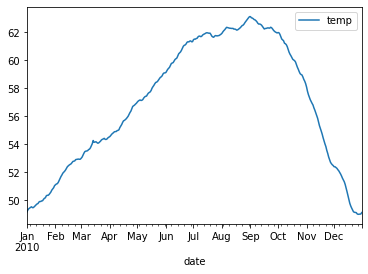

In [9]:
# Plotting

temp_df.resample('D').mean().plot()
plt.show()

#### 2. Write the code necessary to visualize the minimum temperature over time.

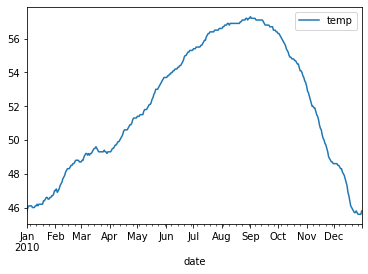

In [10]:
temp_df.resample('D').min().plot()
plt.show()

#### 3. Write the code necessary to visualize the maximum temperature over time.

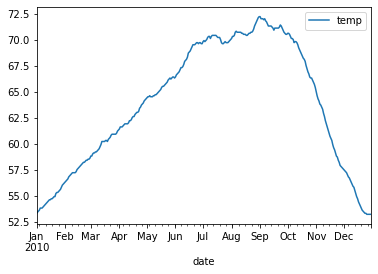

In [11]:
temp_df.resample('D').max().plot()
plt.show()

#### 4. Which month is the coldest, on average?

In [12]:
# I need to find a list of all months, so resample to the average temp of each month, 
# then find the .min() of that new list of monthly averages.

pd.DataFrame(temp_df.resample('M').mean().min(), columns = temp_df.columns)

,temp
temp,49.98414


In [13]:
temp_df.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


January 2010 was the coldest average month, according to this data.

#### 5. Which month has the highest average temperature?

In [14]:
pd.DataFrame(temp_df.resample('M').mean().max(), columns = temp_df.columns)

,temp
temp,62.487083


In [15]:
print("September had the highest average monthly temperatures")

September had the highest average monthly temperatures


#### 6. Resample by the day and calculate the min and max temp for the day (Hint: `.agg(['min', 'max'])`). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [16]:
temp_df['2010-01-02'].shape

(24, 1)

In [ ]:
temp_minmax = temp_df.resample('D').agg(['mean', 'max', 'min'])

In [27]:
temp_df = temp_df['temp'].resample('D').agg(['mean', 'max', 'min'])

In [29]:
temp_df.rename({'mean': 'average_temp', 'max': 'max_temp', 'min': 'min_temp'}, inplace = True)
temp_df.head()

,mean,max,min
date,,,
2010-01-01,49.170833,53.3,45.8
2010-01-02,49.304167,53.4,46.0
2010-01-03,49.391667,53.5,46.1
2010-01-04,49.445833,53.6,46.1
2010-01-05,49.491667,53.8,46.1


In [46]:
temp_df['temp_diff'] = temp_df['max'] - temp_df['min']
temp_df.head()

,mean,max,min,temp_diff
date,,,,
2010-01-01,49.170833,53.3,45.8,7.5
2010-01-02,49.304167,53.4,46.0,7.4
2010-01-03,49.391667,53.5,46.1,7.4
2010-01-04,49.445833,53.6,46.1,7.5
2010-01-05,49.491667,53.8,46.1,7.7


In [52]:
# Now need to resample by month so as to find the month with the greatest range in it's min/max.
max_month = (temp_df.temp_diff.resample('M').max()).max()
temp_df.resample('M').max().sort_values(ascending = False, by = 'temp_diff')

,mean,max,min,temp_diff
date,,,,
2010-08-31,63.129167,72.2,57.2,15.0
2010-09-30,63.129167,72.2,57.3,14.9
2010-06-30,61.395833,69.7,55.3,14.8
2010-07-31,61.975000,70.4,56.6,14.8
2010-10-31,61.991667,70.6,56.3,14.4
2010-05-31,59.108333,66.4,53.7,13.1
2010-04-30,56.933333,64.3,51.3,13.0
2010-03-31,54.508333,61.3,49.6,12.0
2010-11-30,58.095833,65.0,53.2,11.8


August is the month with the highest temperature variability

#### 7. Bonus: 
Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [54]:
temp_df.drop(columns = ['temp_diff'], inplace = True)
temp_df

,mean,max,min
date,,,
2010-01-01,49.170833,53.3,45.8
2010-01-02,49.304167,53.4,46.0
2010-01-03,49.391667,53.5,46.1
2010-01-04,49.445833,53.6,46.1
2010-01-05,49.491667,53.8,46.1
...,...,...,...
2010-12-27,48.991667,53.2,45.6
2010-12-28,49.000000,53.2,45.6
2010-12-29,49.012500,53.2,45.6


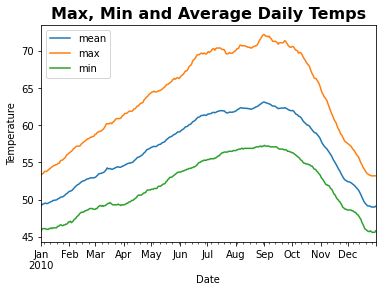

In [61]:
temp_df.plot()
plt.title("Max, Min and Average Daily Temps", fontsize = 16, fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

## Problem Set 2

Use the dataset to answer the following questions:

- Which year and month combination has the highest amount of precipitation?
- Visualize the amount of monthly precipitation over time.
- Visualize the amount of wind over time. Choose a time interval you think is appropriate.
- Which year-month combination is the windiest?
- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
- In which month does it rain the most?
- Which month has the most number of days with a non-zero amount of precipitation?

In [63]:
from vega_datasets import data
se_df = data.seattle_weather()
se_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [64]:
print(se_df.shape), se_df.info()

(1461, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


(None, None)

In [66]:
se_df = se_df.set_index('date')
se_df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


#### 1. Which year and month combination has the highest amount of precipitation?

In [69]:
se_df.index.value_counts()

2015-07-19    1
2014-11-12    1
2014-01-09    1
2015-04-25    1
2015-05-09    1
             ..
2014-10-14    1
2014-10-05    1
2014-07-10    1
2012-02-29    1
2015-12-14    1
Name: date, Length: 1461, dtype: int64

In [84]:
se_df.resample("M").max().sort_values(ascending = False, by = 'precipitation').head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-03-31,55.9,20.6,10.6,5.7,sun


Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date', ylabel='precipitation'>

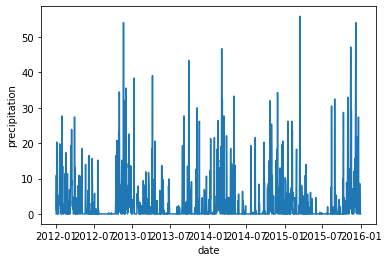

In [87]:
# Basic chart showing the amount of precipitation over time.
sns.lineplot(y = 'precipitation', x = 'date', data = se_df)

In [97]:
# Aggregate average monthly precipitation over time.

se_precip_df = se_df[['precipitation']].resample("M").mean().cumsum()

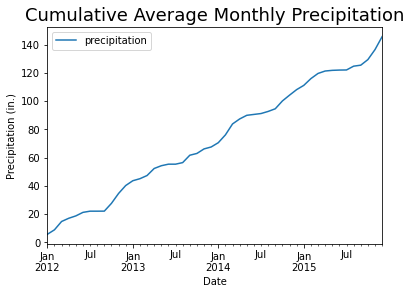

In [102]:
se_precip_df.plot()
plt.title("Cumulative Average Monthly Precipitation", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Precipitation (in.)")
plt.show()

In [110]:
se_df[['precipitation']]
daily_precip['cumulative'] = daily_precip.precipitation.cumsum()

/Users/luke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [111]:
daily_precip

,precipitation,cumulative
date,,
2012-01-01,0.0,0.0
2012-01-02,10.9,10.9
2012-01-03,0.8,11.7
2012-01-04,20.3,32.0
2012-01-05,1.3,33.3
...,...,...
2015-12-27,8.6,4424.5
2015-12-28,1.5,4426.0
2015-12-29,0.0,4426.0


<AxesSubplot:xlabel='date'>

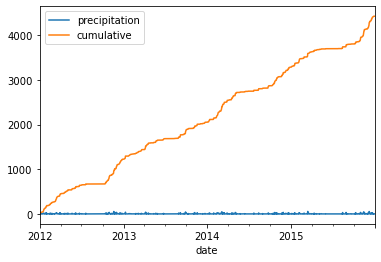

In [112]:
daily_precip.plot()

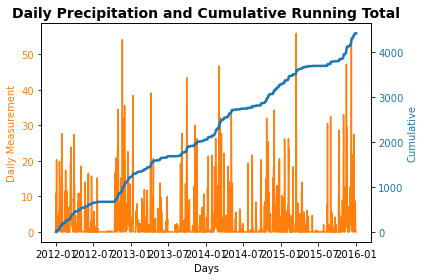

In [150]:
# Creating the data:
data1 = daily_precip.precipitation
data2 = daily_precip.cumulative

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Days')
ax1.set_ylabel('Daily Measurement', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cumulative', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color, linewidth = 2.5, linestyle = "solid")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Daily Precipitation and Cumulative Running Total", fontsize = 14, fontweight = 'bold')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

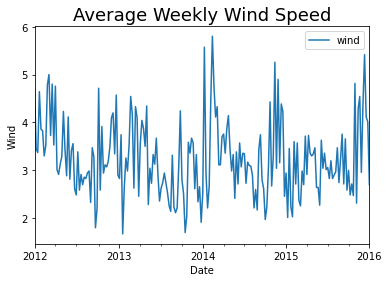

In [158]:
se_df[['wind']].resample("W").mean().plot()
plt.title("Average Weekly Wind Speed", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Wind")
plt.show()

#### Which year-month combination is the windiest?

In [161]:
se_df.resample("M").max().sort_values(ascending = False, by = 'wind').head(1)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,22.6,13.3,8.3,9.5,sun


#### What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)

In [187]:
se_df['is_sunny'] = se_df.weather == 'sun'
se_df.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False
2012-01-03,0.8,11.7,7.2,2.3,rain,False
2012-01-04,20.3,12.2,5.6,4.7,rain,False
2012-01-05,1.3,8.9,2.8,6.1,rain,False


In [195]:
se_df.resample("Y").is_sunny.max()

date
2012-12-31    True
2013-12-31    True
2014-12-31    True
2015-12-31    True
Freq: A-DEC, Name: is_sunny, dtype: bool

In [193]:
se_df[se_df.weather == 'sun'].resample('Y').count().sort_values(ascending = False, by = 'weather').head(1)

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2014-12-31,211,211,211,211,211,211


#### In which month does it rain the most?

In [196]:
se_df[se_df.weather == 'rain'].resample('Y').count().sort_values(ascending = False, by = 'weather').head(1)

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-12-31,191,191,191,191,191,191


In [199]:
se_df[se_df.weather == 'rain'].resample('M').count()

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-01-31,18,18,18,18,18,18
2012-02-29,17,17,17,17,17,17
2012-03-31,19,19,19,19,19,19
2012-04-30,19,19,19,19,19,19
2012-05-31,16,16,16,16,16,16
2012-06-30,19,19,19,19,19,19
2012-07-31,12,12,12,12,12,12
2012-08-31,2,2,2,2,2,2
2012-09-30,4,4,4,4,4,4


In [201]:
se_df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64